# 馬登－朱利安震盪 (MJO) 氣候變異分析

## MJO相位圖 (Phase diagram)

先自己寫一個函數，繪製MJO相位圖的背景。

In [1]:
def plot_mjo_phase_space(figsize):
    
    import numpy as np
    from matplotlib import pyplot as plt
    import matplotlib.lines as lines
    
    fig, ax = plt.subplots(1,1,figsize=figsize) 
    
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.set_xticks(range(-4,5))
    ax.set_yticks(range(-4,5))

    # plot mjo phase diagram lines
    line1 = lines.Line2D([np.cos(np.pi/4), 4], [np.sin(np.pi/4), 4], color='black', linestyle='--', lw=1)
    ax.add_line(line1)
        
    line2 = lines.Line2D([np.cos(3*np.pi/4), -4], [np.sin(np.pi/4), 4], color='black', linestyle='--', lw=1)
    ax.add_line(line2)
        
    line3 = lines.Line2D([np.cos(np.pi/4), 4], [np.sin(7*np.pi/4), -4], color='black', linestyle='--', lw=1)
    ax.add_line(line3)
        
    line4 = lines.Line2D([np.cos(3*np.pi/4), -4], [np.sin(7*np.pi/4), -4], color='black', linestyle='--', lw=1)
    ax.add_line(line4)
        
    line5 = lines.Line2D([-4, -1], [0, 0], color='black', linestyle='--', lw=1)
    ax.add_line(line5)
        
    line6 = lines.Line2D([1, 4], [0, 0], color='black', linestyle='--', lw=1)
    ax.add_line(line6)
        
    line7 = lines.Line2D([0, 0], [1, 4], color='black', linestyle='--', lw=1)
    ax.add_line(line7)
        
    line8 = lines.Line2D([0, 0], [-1, -4], color='black', linestyle='--', lw=1)
    ax.add_line(line8)
        
    amp1_circ = plt.Circle((0, 0), 1, color='black', fill=False)
    ax.add_patch(amp1_circ)
        
    # add phase diagram texts
    ax.text( 1,3,'Phase 6', size='x-large', weight='semibold')
    ax.text(-2,3,'Phase 7', size='x-large', weight='semibold')
    ax.text(2.8,1  ,'Phase 5', size='x-large', weight='semibold', ha='center')
    ax.text(-2.8,1  ,'Phase 8', size='x-large', weight='semibold', ha='center')
        
    ax.text( 1,-3,'Phase 3', size='x-large', weight='semibold')
    ax.text(-2,-3,'Phase 2', size='x-large', weight='semibold')
    ax.text(2.8,-1  ,'Phase 4', size='x-large', weight='semibold', ha='center')
    ax.text(-2.8,-1  ,'Phase 1', size='x-large', weight='semibold', ha='center')
        
    ax.text( 0,3.7,'Pacific Ocean', ha='center', bbox=dict(facecolor='white', edgecolor='white'))
    ax.text( 0,-3.8,'Indian Ocean', ha='center', bbox=dict(facecolor='white', edgecolor='white'))
    ax.text(-3.8,0,'West. Hem., Africa', va='center', rotation='vertical', bbox=dict(facecolor='white', edgecolor='white'))
    ax.text(3.7,0,'Maritime Continent', va='center', rotation='vertical', bbox=dict(facecolor='white', edgecolor='white'))
        
    ax.set_xlabel('RMM1')
    ax.set_ylabel('RMM2')

    return fig, ax

相位圖的橫軸是RMM1，縱軸是RMM2，所以將資料點在相位圖上可以利用`xarray.plot.Dataset.scatter()`，繪圖前必須將RMM1和RMM2存成`xarray.Dataset`。

```{note}
BoM RMM index可以從 [IRI data library](https://iridl.ldeo.columbia.edu/SOURCES/.BoM/.MJO/.RMM/datasetdatafiles.html?Set-Language=en) 下載。
```

In [2]:
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt

# Read MJO data

mjo_ds = xr.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.BoM/.MJO/.RMM/dods',
                         decode_times=False)

T = mjo_ds.T.values
mjo_ds['T'] = pd.date_range("1974-06-01", periods=len(T))  # 資料的起始時間為1974-06-01
mjo_ds

syntax error, unexpected WORD_WORD, expecting ';' or ','
context: Attributes { T { String standard_name "time"; Float32 pointwidth 1.0; String calendar "standard"; Int32 expires 1652918400; Int32 gridtype 0; String units "julian_day"; } amplitude { Int32 expires 1652918400; String units "unitless"; Float32 missing_value 9.99999962E35; } phase { Int32 expires 1652918400; String units "unitless"; Float32 missing_value 999.0; } RMM1 { Int32 expires 1652918400; String units "unitless"; Float32 missing_value 9.99999962E35; } RMM2 { Int32 expires 1652918400; String units "unitless"; Float32 missing_value 9.99999962E35; }NC_GLOBAL { URL summary from BoM^ "http://www.bom.gov.au/climate/mjo/"; String Conventions "IRIDL"; Int32 expires 1652918400; String description "Real-time Multivariate MJO Index (with components of interannual variability removed)"; URL Wheeler and Hendon (2004) Monthly Weather Review article "http://journals.ametsoc.org/doi/abs/10.1175/1520-0493(2004)132%3C1917:AARMMI%3E2.0

<xarray.Dataset>
Dimensions:    (T: 17518)
Coordinates:
  * T          (T) datetime64[ns] 1974-06-01 1974-06-02 ... 2022-05-17
Data variables:
    amplitude  (T) float32 ...
    phase      (T) float32 ...
    RMM1       (T) float32 ...
    RMM2       (T) float32 ...

`mjo_ds`包含振幅 (amplitude)、相位 (phase，從1至8)、RMM1和RMM2，我們會用到的是後兩者。

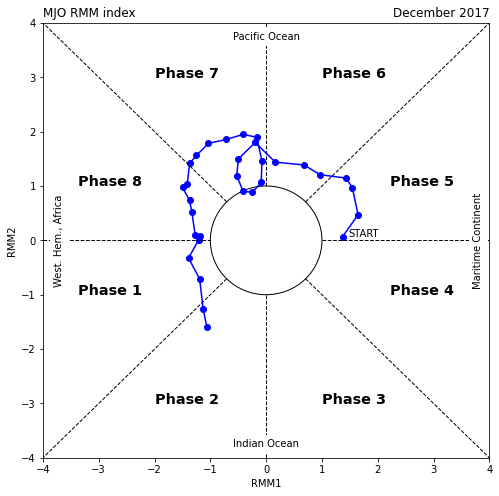

In [3]:
time1 = '2017-12-01'
time2 = '2017-12-31'

fig, ax = plot_mjo_phase_space(figsize=(8,8))

mjo_ds = mjo_ds.sel(T=slice(time1,time2))
    
plot = mjo_ds.plot.scatter(x="RMM1", y="RMM2",ax=ax,color='blue')
plt.plot(mjo_ds.RMM1, mjo_ds.RMM2, color='blue')
ax.text(mjo_ds.RMM1.isel(T=0)+0.1,mjo_ds.RMM2.isel(T=0),'START',ha='left')

ax.set_title('MJO RMM index', loc='left')
ax.set_title('December 2017', loc='right')

plt.show()